### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines3 import PPO, A2C, DQN
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Import classes
from rl_environment import Environment

### 2. Environment creation

#### Parameters for Simulation

In [3]:
number_of_regional_warehouses = 2
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 60
customer_demand_per_step = [2,3,1]  # List needs one entry per regional warehouse 
simulation_length = 40
lead_time = 2
shipment_amount = [10]  # Regarding regional warehouses
with_manufacturer = True
cw_shipment_amount = 10  # Regarding central warehouse
manufacturer_prod_capacity_per_step = 3
shipment_var_cost_per_unit = 0.02
shipment_fixed_cost = .25  # Reward penalty
inventory_holding_cost_multiplier = 1 # Standard = 1; Can be lowered; Not higher that 1
cw_inventory_holding_cost_multiplier = .5
demand_fluctuation = 0
lead_time_fluctuation = 0
customer_priorities = [1, 0, 1] # List needs one entry per regional warehouse customer 

#### Parameters for Agent Training

In [4]:
algorithm = "PPO"  # "PPO", "A2C" or "DQN"
training_steps = 100000

print("-> Equals to " + str(int(training_steps/simulation_length)) + " training episodes")

-> Equals to 2500 training episodes


###### Determine if chosen algorithm needs discrete action space

In [5]:
algorithms_that_need_single_action_value = ["DQN"]

if algorithm.upper() in algorithms_that_need_single_action_value:
    use_single_value_action_space = True
else:
    use_single_value_action_space = False

#### Creating Environment

In [6]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step,
                  shipment_var_cost_per_unit = shipment_var_cost_per_unit,
                  shipment_fixed_cost = shipment_fixed_cost,
                  inventory_holding_cost_multiplier = inventory_holding_cost_multiplier,
                  cw_inventory_holding_cost_multiplier = cw_inventory_holding_cost_multiplier,
                  demand_fluctuation = demand_fluctuation,
                  lead_time_fluctuation = lead_time_fluctuation,
                  use_single_value_action_space = use_single_value_action_space,
                  customer_priorities = customer_priorities
                 )

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 20
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 2 ; Priority: 1.0 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 3 ; Priority: 0.5 ; Lost sales: 0

-> Production plant:
manufacturer ; Production per step: 3 ; Inventory: 100
________________________________________________________________________________
Environment Information
-----------------------
-> Gym spaces:
Observation space: Dict(cw_inventory:Discrete(61), cw_shipment:Discrete(2), rw_inventories:MultiDiscrete([31 31]), shipments:MultiDiscrete([2 2]))
Action space: MultiDiscrete([2 2 2])
Starting state: {'rw_inventories': array([10, 10]), 'shipments': array([0, 0]), 'cw_inventory': 20, 'cw_shipment': 0}

-> Reward penalty per shipment size

### 3. RL model training

###### Model Selection
PPO (Proximal Policy Optimization)
https://openai.com/blog/openai-baselines-ppo/

A2C
https://openai.com/blog/baselines-acktr-a2c/

In [7]:
# Choose algorithm based on user decision
if algorithm.upper() == "PPO":
    trained_model = PPO("MultiInputPolicy", env, verbose=1)
elif algorithm.upper() == "A2C":
    trained_model = A2C("MultiInputPolicy", env, verbose=1)
elif algorithm.upper() == "DQN":
    trained_model = DQN("MultiInputPolicy", env, verbose=1)
else:
    print("Model not found")
    exit()

# Start model training
trained_model.learn(total_timesteps=training_steps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40       |
|    ep_rew_mean     | -0.193   |
| time/              |          |
|    fps             | 768      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 0.0342      |
| time/                   |             |
|    fps                  | 548         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015100772 |
|    clip_fraction        | 0.228       |
|    clip_range           | 0.2         |
|    entropy_loss   

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 40         |
|    ep_rew_mean          | 3.95       |
| time/                   |            |
|    fps                  | 375        |
|    iterations           | 11         |
|    time_elapsed         | 59         |
|    total_timesteps      | 22528      |
| train/                  |            |
|    approx_kl            | 0.01223097 |
|    clip_fraction        | 0.131      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.51      |
|    explained_variance   | 0.541      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.195      |
|    n_updates            | 100        |
|    policy_gradient_loss | -0.0156    |
|    value_loss           | 0.388      |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 6.16         |
| time/                   |              |
|    fps                  | 369          |
|    iterations           | 21           |
|    time_elapsed         | 116          |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0076029133 |
|    clip_fraction        | 0.0615       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.925       |
|    explained_variance   | 0.623        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.232        |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00547     |
|    value_loss           | 0.703        |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 6.89         |
| time/                   |              |
|    fps                  | 377          |
|    iterations           | 31           |
|    time_elapsed         | 168          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0056156474 |
|    clip_fraction        | 0.0667       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.653       |
|    explained_variance   | 0.656        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.365        |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.0043      |
|    value_loss           | 0.81         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 7.57         |
| time/                   |              |
|    fps                  | 380          |
|    iterations           | 41           |
|    time_elapsed         | 220          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0037388145 |
|    clip_fraction        | 0.0402       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.447       |
|    explained_variance   | 0.735        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.465        |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00291     |
|    value_loss           | 0.75         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

###### Learning Curve

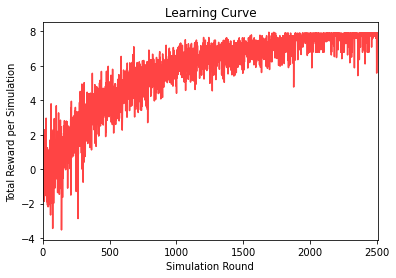

Total Rewards: [0, 0.11455324067397263, -1.6627795752807164, -1.288573280769513, 0.9035727610217376, 1.96559898599877, 0.37494792830872464, 0.780537481016042, -1.2028538753626443, 0.12391522932264185, -1.8717846413060804, -1.3727063176063907, -0.17231815025932656, 1.3785070818016036, 2.290158586355472, -0.587820422976537, 1.2702415452340918, 1.0384619073911037, -1.0492359027305098, -0.8533127547833428, -0.309854547395939, -0.5990491582546369, 0.8182316794545896, -1.541222238087563, 2.9576303121605303, 0.8105833293526792, -1.110984503324657, -0.016657104276986134, 0.6873198850210116, -0.4204897368815489, -1.8963823173681633, 0.8298738298738311, -0.3139565235641927, 1.2421925296925298, -2.090025449801908, 0.6454292439586556, 0.0517959222293589, -2.1799626797128275, 0.5684213315222424, 0.23303942073291906, 0.7189911939911944, -2.171652029761667, -1.0864242622400544, -0.9797668058761347, -0.4604030243349128, -1.8357293644015003, 1.1210276603515934, -0.4181459110794601, -0.31480503538448656

In [8]:
# Plot learning curve
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(env.total_reward, color="#FF4444")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.show()

# Print used data if True
if True:
    print("Total Rewards:", env.total_reward)

### 4. Run simulation

In [9]:
# Convert actions for graphs
def convert_to_marker_pos(action):
    return_list = []
    i = 0
    for entry in action:
        if entry != 0:
            return_list.append(i)
        i += 1
    return return_list


# Graph data
cw_inventory_level, cw_actions = [], []
inventory_levels, actions = {}, {}
manufacturer_inventory = []

for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = [0]
    actions[rw_id] = [0]

In [10]:
# Reset environment for simulation
state = env.reset()
done = False

# Run simulation with model
while not done:
    action, _states = trained_model.predict(state) 
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1

    i = 1
    for act in info["Action:"][0:len(env.simulation.get_regional_warehouses())]:
        actions[i].append(act)
        i += 1
    
    try:
        cw_inventory_level.append(info["CW Inv:"])
        cw_actions.append(info["Action:"][-1])
        manufacturer_inventory.append(info["Manufacturer:"])
    except:
        pass
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Round: 1 | RW Invs: [8, 7] | Shipments [0, 0] | Action: [0, 0, 1] | Reward: 0.09 | CW Inv: 20 | Manufacturer: 0 | 
Round: 2 | RW Invs: [6, 4] | Shipments [0, 1] | Action: [0, 1, 1] | Reward: -0.02 | CW Inv: 10 | Manufacturer: 3 | 
Round: 3 | RW Invs: [4, 1] | Shipments [0, 1] | Action: [0, 0, 1] | Reward: 0.24 | CW Inv: 20 | Manufacturer: 6 | 
Round: 4 | RW Invs: [2, 8] | Shipments [1, 1] | Action: [1, 1, 0] | Reward: 0.01 | CW Inv: 0 | Manufacturer: 9 | 
Round: 5 | RW Invs: [0, 5] | Shipments [1, 1] | Action: [0, 1, 0] | Reward: 0.41 | CW Inv: 0 | Manufacturer: 12 | 
Round: 6 | RW Invs: [8, 12] | Shipments [0, 0] | Action: [0, 0, 1] | Reward: 0.23 | CW Inv: 0 | Manufacturer: 5 | 
Round: 7 | RW Invs: [6, 9] | Shipments [0, 0] | Action: [0, 0, 1] | Reward: 0.25 | CW Inv: 0 | Manufacturer: 8 | 
Round: 8 | RW Invs: [4, 6] | Shipments [0, 0] | Action: [0, 0, 1] | Reward: 0.13 | CW Inv: 10 | Manufacturer: 1 | 
Round: 9 | RW Invs: [2, 3] | Shipments [1, 0] | Action: [1, 1, 0] | Reward: 0.06 

###### Inventory level graphs

RW 1 data:
Inventory: [0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0, 8, 6, 4, 2, 0]
Actions: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
____________________________________________________________________________________________________
RW 2 data:
Inventory: [0, 7, 4, 1, 8, 5, 12, 9, 6, 3, 0, 0, 0, 7, 4, 1, 0, 0, 0, 0, 0, 0, 7, 4, 1, 0, 0, 0, 0, 0, 0, 0, 7, 4, 1, 0, 0, 0, 0, 0, 0]
Actions: [0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1]
____________________________________________________________________________________________________


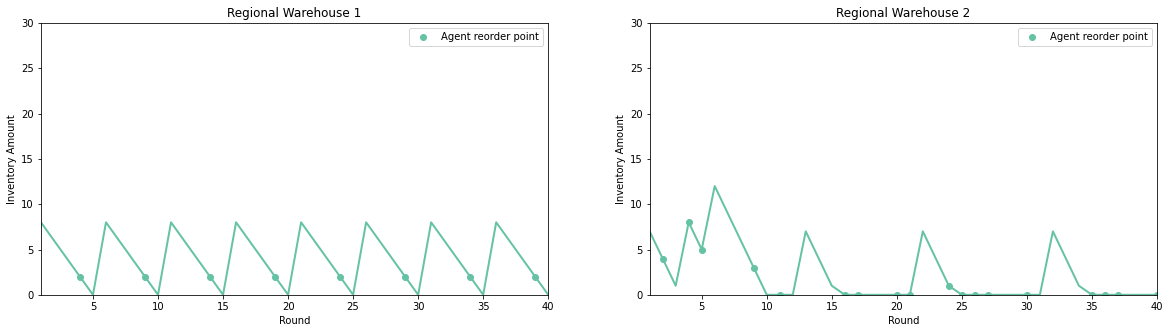

In [11]:
# Plots inventories of regional warehouses

reorder_marker = mlines.Line2D([],[], color='#66C2A5', marker='o', linestyle='None', label="Agent reorder point")
plt.rcParams["figure.figsize"] = (20, 5)

for rw_id in inventory_levels:
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id], "-bo", markevery=convert_to_marker_pos(actions[rw_id]), color="#66C2A5", linewidth=2)
    plt.legend(handles=[reorder_marker])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(1, simulation_length)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    
    # Print used data if True
    if True:
        print("RW", rw_id, "data:")
        print("Inventory:", inventory_levels[rw_id])
        print("Actions:", actions[rw_id])
        print("_"*100)

plt.show()

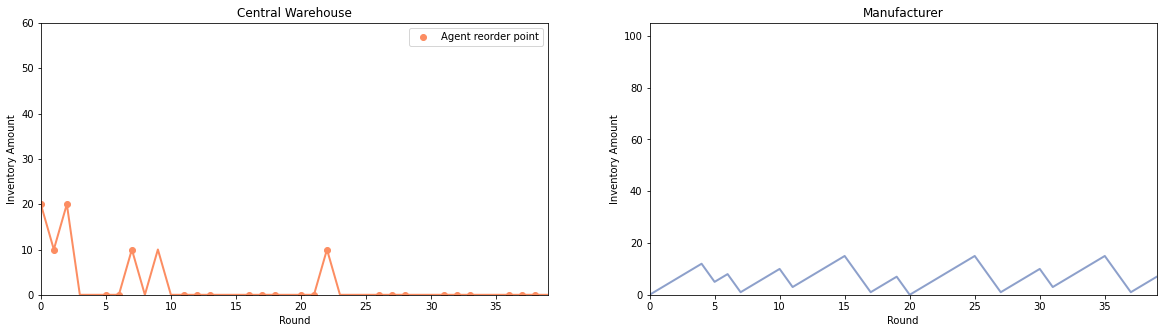

CW Inventory: [20, 10, 20, 0, 0, 0, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CW Actions: [1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
Manufacturer Inventrory: [0, 3, 6, 9, 12, 5, 8, 1, 4, 7, 10, 3, 6, 9, 12, 15, 8, 1, 4, 7, 0, 3, 6, 9, 12, 15, 8, 1, 4, 7, 10, 3, 6, 9, 12, 15, 8, 1, 4, 7]


In [12]:
# Plots for CW and Manufacturer (Will only display if manufacturer is simulated)
if len(cw_inventory_level) != 0:
    # Plot for CW inventory with ordering points
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.subplot(1, 2, 1)
    reorder_marker = mlines.Line2D([],[], color='#FC8D62', marker='o', linestyle='None', label="Agent reorder point")
    plt.plot(cw_inventory_level, "-bo", color="#FC8D62", markevery=convert_to_marker_pos(cw_actions), linewidth=2)
    plt.legend(handles=[reorder_marker])
    plt.title("Central Warehouse")
    plt.ylim(0, max_inventory_amount_central_warehouse)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    
    # Plot for manufacturer inventory
    plt.subplot(1, 2, 2)
    plt.plot(manufacturer_inventory, color="#8DA0CB", linewidth=2)
    plt.title("Manufacturer")
    plt.ylim(0, env.simulation.get_manufacturer().get_inventory_limit()+5)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    plt.show()
    
    # Print used data if True
    if True:
        print("CW Inventory:", cw_inventory_level)
        print("CW Actions:", cw_actions)
        print("Manufacturer Inventrory:", manufacturer_inventory)